In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [ ]:
! git clone https://github.com/rockerritesh/NepaliSentiment

Cloning into 'NepaliSentiment'...
remote: Enumerating objects: 72, done.
remote: Counting objects: 100% (72/72), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 72 (delta 36), reused 14 (delta 5), pack-reused 0
Unpacking objects: 100% (72/72), done.


In [ ]:
# Reading the train, test

df_train = pd.read_csv('/content/NepaliSentiment/train.csv',encoding='utf-8')
df_test = pd.read_csv('/content/NepaliSentiment/test.csv',encoding='utf-8')

,encoding='utf-8'

In [ ]:
df_train

,text,label
0,बजार ले जसरी ट्रेन्ड चेन्ज गर्यो यो हेर्दा तत्...,2
1,1000 अंकले घटेको नेप्से 200 अंकले बढ्नु ठूलो क...,1
2,होइन यो सानिमा बैंक ले bonus घोसणा गरेको २ महि...,2
3,"खैँ MBJC प्रति कित्तामा रू,10/-ले बढेर आज रू,1...",2
4,राम्रो भयो️️,1
...,...,...
5995,समाज परिवर्तन गराउन लाई अरु को मुख हेर्ने भन्द...,1
5996,"Filmy क्षेत्रमा धेरै गर्नु भयो,,अब समाज र देश ...",2
5997,यस्तै यस्तै कार्यक्रम अझ बढी हुन जरुरी छ कुना ...,2
5998,बधाई र सुभकामना ।।,1


In [ ]:
df_test

,text,label
0,असाध्यै राम्रो कार्यक्रम आयोजना गरिएको छ हजुरह...,1
1,"राम्रो कार्यक्रम, पहिलो सिजनले समेटेको कार्यक्...",1
2,महानायक राजेश हमाल तपाई साँच्चै धन्यवादको पात्...,1
3,जातको प्रष्न बाट सबै जनालाई सकरात्मक सन्देश मि...,1
4,"बहसको सुरुवात भएको छ, अझै जोडदार रुपमा गर्नुपर...",1
...,...,...
1991,कस्ता कस्ता पागल memory king छन यार नेपालमा,0
1992,दोस्रो मूर्ख बिजय साही हो,0
1993,बिजय शाहीलाई किन निरुत्साहित गरेको त पुण्य गौत...,0
1994,यस्ता बिदेशी महादलालीहरु कहाँ गएर यो प्रश्नको ...,0


In [ ]:
df_train['label'].value_counts()

1     2378
0     2377
2     1236
-        5
20       1
11       1
o        1
--       1
Name: label, dtype: int64

In [ ]:
df_test['label'].value_counts()

1    888
0    610
2    496
o      1
-      1
Name: label, dtype: int64

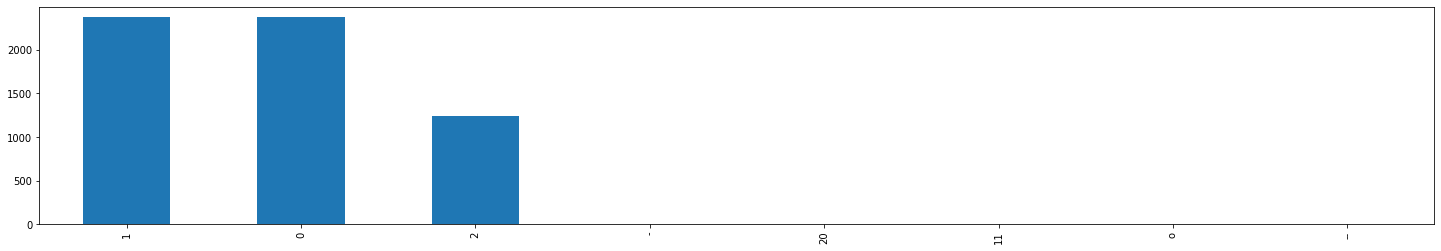

In [ ]:
plt.figure(figsize=(25,4))
df_train['label'].value_counts().plot(kind='bar')
plt.axis()
plt.show()

In [ ]:
df_train['label'].value_counts().shape

(8,)

In [ ]:
df_train.dropna()

,text,label
0,बजार ले जसरी ट्रेन्ड चेन्ज गर्यो यो हेर्दा तत्...,2
1,1000 अंकले घटेको नेप्से 200 अंकले बढ्नु ठूलो क...,1
2,होइन यो सानिमा बैंक ले bonus घोसणा गरेको २ महि...,2
3,"खैँ MBJC प्रति कित्तामा रू,10/-ले बढेर आज रू,1...",2
4,राम्रो भयो️️,1
...,...,...
5995,समाज परिवर्तन गराउन लाई अरु को मुख हेर्ने भन्द...,1
5996,"Filmy क्षेत्रमा धेरै गर्नु भयो,,अब समाज र देश ...",2
5997,यस्तै यस्तै कार्यक्रम अझ बढी हुन जरुरी छ कुना ...,2
5998,बधाई र सुभकामना ।।,1


In [ ]:
df_test.dropna()

,text,label
0,असाध्यै राम्रो कार्यक्रम आयोजना गरिएको छ हजुरह...,1
1,"राम्रो कार्यक्रम, पहिलो सिजनले समेटेको कार्यक्...",1
2,महानायक राजेश हमाल तपाई साँच्चै धन्यवादको पात्...,1
3,जातको प्रष्न बाट सबै जनालाई सकरात्मक सन्देश मि...,1
4,"बहसको सुरुवात भएको छ, अझै जोडदार रुपमा गर्नुपर...",1
...,...,...
1991,कस्ता कस्ता पागल memory king छन यार नेपालमा,0
1992,दोस्रो मूर्ख बिजय साही हो,0
1993,बिजय शाहीलाई किन निरुत्साहित गरेको त पुण्य गौत...,0
1994,यस्ता बिदेशी महादलालीहरु कहाँ गएर यो प्रश्नको ...,0


In [ ]:
df_train.drop(df_train[df_train['label'] == '-'].index, inplace = True)
df_train.drop(df_train[df_train['label'] == '20'].index, inplace = True)
df_train.drop(df_train[df_train['label'] == '11'].index, inplace = True)
df_train.drop(df_train[df_train['label'] == 'o'].index, inplace = True)
df_train.drop(df_train[df_train['label'] == '--'].index, inplace = True)

In [ ]:
df_test.drop(df_test[df_test['label'] == '-'].index, inplace = True)
df_test.drop(df_test[df_test['label'] == 'o'].index, inplace = True)

In [ ]:
len(df_train)

5991

In [ ]:
#df_train.drop(df_train.index[[850,3869]],inplace=True)

In [ ]:
len(df_train)

5991

# ML

In [ ]:
df_train['label']

0       2
1       1
2       2
3       2
4       1
       ..
5995    1
5996    2
5997    2
5998    1
5999    1
Name: label, Length: 5991, dtype: object

In [ ]:
df_train.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            5990, 5991, 5992, 5993, 5994, 5995, 5996, 5997, 5998, 5999],
           dtype='int64', length=5991)

In [ ]:
df_test['label'].value_counts()

1    888
0    610
2    496
Name: label, dtype: int64

In [ ]:
df_train['label'].value_counts()

1    2378
0    2377
2    1236
Name: label, dtype: int64

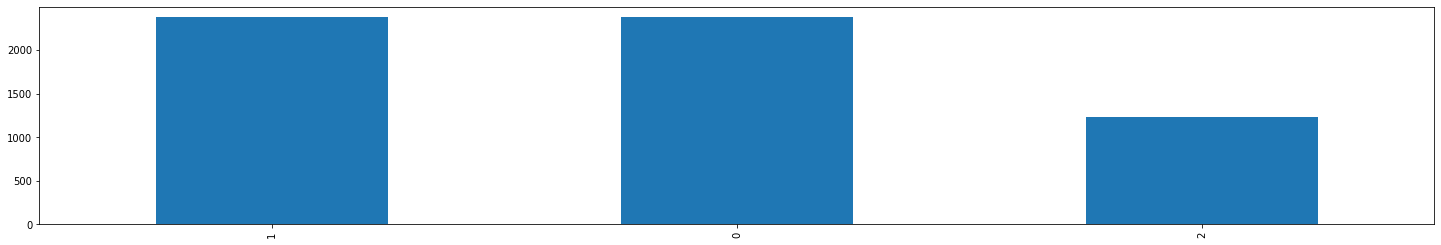

In [ ]:
plt.figure(figsize=(25,4))
df_train['label'].value_counts().plot(kind='bar')
plt.axis()
plt.show()

In [ ]:
df_train

,text,label
0,बजार ले जसरी ट्रेन्ड चेन्ज गर्यो यो हेर्दा तत्...,2
1,1000 अंकले घटेको नेप्से 200 अंकले बढ्नु ठूलो क...,1
2,होइन यो सानिमा बैंक ले bonus घोसणा गरेको २ महि...,2
3,"खैँ MBJC प्रति कित्तामा रू,10/-ले बढेर आज रू,1...",2
4,राम्रो भयो️️,1
...,...,...
5995,समाज परिवर्तन गराउन लाई अरु को मुख हेर्ने भन्द...,1
5996,"Filmy क्षेत्रमा धेरै गर्नु भयो,,अब समाज र देश ...",2
5997,यस्तै यस्तै कार्यक्रम अझ बढी हुन जरुरी छ कुना ...,2
5998,बधाई र सुभकामना ।।,1


In [ ]:
X_train, y_train = df_train['text'],df_train['label']
X_test, y_test = df_test['text'],df_test['label']

In [ ]:
df_train.index[0]

0

## emoji

In [ ]:
!pip install emot

In [ ]:
import re
import pickle
from emot.emo_unicode import *

In [ ]:
X_TRAIN=[]

In [ ]:
# 'Emoji_Dict.p'- download link https://drive.google.com/open?id=1G1vIkkbqPBYPKHcQ8qy0G2zkoab2Qv4v
with open('Emoji_Dict.p', 'rb') as fp:
    Emoji_Dict = pickle.load(fp)
Emoji_Dict = {v: k for k, v in Emoji_Dict.items()}

In [ ]:
def convert_emojis_to_word(text):
    for emot in Emoji_Dict:
        text = re.sub(r'('+emot+')', "_".join(Emoji_Dict[emot].replace(",","").replace(":","").split()), text)
    return text

In [ ]:
for i in range(len(X_train)):
  test=convert_emojis_to_word(X_train[df_train.index[i]])
  X_TRAIN.append(test)

TypeError: ignored

In [ ]:
len(X_TRAIN)

3869

In [ ]:
len(X_train)

5991

In [ ]:
X_TEST=[]
Y_TEST=[]


for i in range(len(X_test)):
  if(i==972):
    print(i)
  else:
    test=convert_emojis_to_word(X_test[df_test.index[i]])
    X_TEST.append(test)
    testy= y_test[df_test.index[i]]
    Y_TEST.append(testy)

In [ ]:
len(X_test)

In [ ]:
len(X_TEST)

In [ ]:
X_train[3871]

In [ ]:
X_TRAIN[3868]

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
!ls /root/nltk_data/corpora/stopwords

In [ ]:
#X_train=X_train.values.astype('U')
#X_test=X_test.values.astype('U')

In [ ]:
X_train

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

#stopwords_list = stopwords.words('english') + stopwords.words('nepali')

stopWords = set(nltk.corpus.stopwords.words('/content/nepali'))

cv_doc = CountVectorizer(max_features=20000,stop_words=stopWords ,ngram_range=(1,1), min_df=3,encoding='utf-8')
cv_vector = cv_doc.fit(X_train)

In [ ]:
from nltk.corpus import stopwords
#from nltk import TweetTokenizer
#tokenizer = TweetTokenizer()

In [ ]:
stopWords = nltk.corpus.stopwords.words('/content/NepaliSentiment/nepali') + stopwords.words('english') + nltk.corpus.stopwords.words('/content/NepaliSentiment/hindi')

tfidfVectorizer = TfidfVectorizer(max_features=50000,tokenizer=lambda x: x.split(" ") ,sublinear_tf=True, encoding='utf-8',decode_error='ignore',ngram_range=(1, 1),stop_words=stopWords)

vectorised = tfidfVectorizer.fit(X_TRAIN)

In [ ]:
# FOR EMOJII
X_train = vectorised.transform(X_TRAIN)
X_test= vectorised.transform(X_TEST)

In [ ]:
X_train = vectorised.transform(X_train)
X_test= vectorised.transform(X_test)

In [ ]:
from gensim.models import Word2Vec, KeyedVectors
#model = Word2Vec(X_train, size=1000, min_count=5, window=10, sg=0, workers=10)
#print("Vocabulary dimension", model.vector_size)
#print("Number of words in vocab", len(model.wv.vocab))

In [ ]:
#model.wv.most_similar('न', topn=10)

In [ ]:
#X_train = cv_vector.transform(X_train)
#X_test= cv_vector.transform(X_test)

In [ ]:
X_train

In [ ]:
len(Y_TEST)

In [ ]:
y_test

In [ ]:
# FOR EMOJI
label_encoder = LabelEncoder().fit(y_train)

y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(Y_TEST)

In [ ]:
label_encoder = LabelEncoder().fit(y_train)

y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)

In [ ]:
#FOR EMOJI
from sklearn.svm import LinearSVC
clf=LinearSVC(loss='hinge',random_state=0,max_iter=10000,penalty='l2')
clf.fit(X_train, y_train)    # training model on train data

clfval = clf.predict(X_test)   # predicting test data
print('F1 Score : {}'.format(f1_score(y_test, clfval, average='micro')))  # printing F1 score

from sklearn.svm import SVC
clf=SVC(kernel='linear',random_state=0,max_iter=10000)
clf.fit(X_train, y_train)    # training model on train data

clfval = clf.predict(X_test)   # predicting test data
print('F1 Score : {}'.format(f1_score(y_test, clfval, average='micro')))  # printing F1 score


from sklearn.svm import SVC
clf=SVC(kernel='linear',random_state=0,max_iter=10000)
clf.fit(X_train, y_train)    # training model on train data

clfval = clf.predict(X_test)   # predicting test data
print('F1 Score : {}'.format(f1_score(y_test, clfval, average='micro')))  # printing F1 score

from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB(alpha=1.5,fit_prior=False)
nb.fit(X_train,y_train)

from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % f1_score(y_test, y_pred,average='micro'))

In [ ]:
from sklearn.svm import LinearSVC
clf=LinearSVC(loss='hinge',random_state=0,max_iter=10000,penalty='l2')
clf.fit(X_train, y_train)    # training model on train data

clfval = clf.predict(X_test)   # predicting test data
print('F1 Score : {}'.format(f1_score(y_test, clfval, average='micro')))  # printing F1 score


In [ ]:
from sklearn.svm import SVC
clf=SVC(kernel='linear',random_state=0,max_iter=10000)
clf.fit(X_train, y_train)    # training model on train data

clfval = clf.predict(X_test)   # predicting test data
print('F1 Score : {}'.format(f1_score(y_test, clfval, average='micro')))  # printing F1 score


In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB(alpha=1.5,fit_prior=False)
nb.fit(X_train,y_train)

from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % f1_score(y_test, y_pred,average='micro'))

In [ ]:
from sklearn.linear_model import LogisticRegression
lrr=LogisticRegression(solver='saga', n_jobs=1, C=1e5)
lrr.fit(X_train, y_train)
lrrval = lrr.predict(X_test)
print('F1 Score : {}'.format(f1_score(y_test, lrrval, average='micro')))

In [ ]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB(alpha=0.9,fit_prior=False)
clf.fit(X_train, y_train)
clfval = clf.predict(X_test)
print('F1 Score : {}'.format(f1_score(y_test, clfval, average='micro')))

In [ ]:
from sklearn.naive_bayes import ComplementNB
cllf = ComplementNB(alpha=1.0, fit_prior=False,norm=True)
cllf.fit(X_train, y_train)
cllfval = clf.predict(X_test)
print('F1 Score : {}'.format(f1_score(y_test, cllfval, average='micro')))

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
cclf = PassiveAggressiveClassifier(max_iter=2500, random_state=43,tol=1e-5)
cclf.fit(X_train, y_train)

cllfval = cclf.predict(X_test)
print('F1 Score : {}'.format(f1_score(y_test, cllfval, average='micro')))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.2,max_depth=1, random_state=0).fit(X_train, y_train)

gbpred=clf.predict(X_test)
print('F1 Score : {}'.format(f1_score(y_test, gbpred, average='micro')))

In [ ]:

from sklearn.linear_model import Perceptron

percept = Perceptron(alpha=0.00001, tol=1e-6, penalty='l1', random_state=1, max_iter=3000)
percept = percept.fit(X_train, y_train)

cpfval = percept.predict(X_test)
print('F1 Score : {}'.format(f1_score(y_test, cpfval, average='micro')))

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

clf = BaggingClassifier(base_estimator=SVC(kernel='linear',random_state=0,max_iter=10000),n_estimators=10, random_state=0).fit(X_train, y_train)
cpfval = clf.predict(X_test)
print('F1 Score : {}'.format(f1_score(y_test, cpfval, average='micro')))

In [ ]:
from sklearn.naive_bayes import MultinomialNB

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

clf = BaggingClassifier(base_estimator=MultinomialNB(alpha=1.20,fit_prior=False),n_estimators=10, random_state=0).fit(X_train, y_train)
cpfval = clf.predict(X_test)
print('F1 Score : {}'.format(f1_score(y_test, cpfval, average='micro')))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(weights='distance',algorithm='brute' ,n_neighbors=5)
neigh.fit(X_train, y_train)

ngval = clf.predict(X_test)
print('F1 Score : {}'.format(f1_score(y_test, ngval, average='micro')))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

#countvector
import seaborn as sns
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cf_matrix, linewidths=1, annot=True, ax=ax, fmt='g')

# TRansformer

In [ ]:
df_train

,text,label
0,बजार ले जसरी ट्रेन्ड चेन्ज गर्यो यो हेर्दा तत्...,2
1,1000 अंकले घटेको नेप्से 200 अंकले बढ्नु ठूलो क...,1
2,होइन यो सानिमा बैंक ले bonus घोसणा गरेको २ महि...,2
3,"खैँ MBJC प्रति कित्तामा रू,10/-ले बढेर आज रू,1...",2
4,राम्रो भयो️️,1
...,...,...
5995,समाज परिवर्तन गराउन लाई अरु को मुख हेर्ने भन्द...,1
5996,"Filmy क्षेत्रमा धेरै गर्नु भयो,,अब समाज र देश ...",2
5997,यस्तै यस्तै कार्यक्रम अझ बढी हुन जरुरी छ कुना ...,2
5998,बधाई र सुभकामना ।।,1


In [ ]:
df_test

,text,label
0,असाध्यै राम्रो कार्यक्रम आयोजना गरिएको छ हजुरह...,1
1,"राम्रो कार्यक्रम, पहिलो सिजनले समेटेको कार्यक्...",1
2,महानायक राजेश हमाल तपाई साँच्चै धन्यवादको पात्...,1
3,जातको प्रष्न बाट सबै जनालाई सकरात्मक सन्देश मि...,1
4,"बहसको सुरुवात भएको छ, अझै जोडदार रुपमा गर्नुपर...",1
...,...,...
1991,कस्ता कस्ता पागल memory king छन यार नेपालमा,0
1992,दोस्रो मूर्ख बिजय साही हो,0
1993,बिजय शाहीलाई किन निरुत्साहित गरेको त पुण्य गौत...,0
1994,यस्ता बिदेशी महादलालीहरु कहाँ गएर यो प्रश्नको ...,0


In [ ]:
df = pd.DataFrame.merge(df_train,df_test,how='outer')
len(df)

7975

In [ ]:
df  = df.dropna()

In [ ]:
df

,text,label
0,बजार ले जसरी ट्रेन्ड चेन्ज गर्यो यो हेर्दा तत्...,2
1,1000 अंकले घटेको नेप्से 200 अंकले बढ्नु ठूलो क...,1
2,होइन यो सानिमा बैंक ले bonus घोसणा गरेको २ महि...,2
3,"खैँ MBJC प्रति कित्तामा रू,10/-ले बढेर आज रू,1...",2
4,राम्रो भयो️️,1
...,...,...
7970,कस्ता कस्ता पागल memory king छन यार नेपालमा,0
7971,दोस्रो मूर्ख बिजय साही हो,0
7972,बिजय शाहीलाई किन निरुत्साहित गरेको त पुण्य गौत...,0
7973,यस्ता बिदेशी महादलालीहरु कहाँ गएर यो प्रश्नको ...,0


In [ ]:
y = pd.get_dummies(df.label, prefix='label')
print(y.head())

   label_0  label_1  label_2
0        0        0        1
1        0        1        0
2        0        0        1
3        0        0        1
4        0        1        0


In [ ]:
len(y)

7974

In [ ]:
df['label_0'] = y['label_0']
df['label_1'] = y['label_1']
df['label_2'] = y['label_2']

In [ ]:
df

,text,label,label_0,label_1,label_2
0,बजार ले जसरी ट्रेन्ड चेन्ज गर्यो यो हेर्दा तत्...,2,0,0,1
1,1000 अंकले घटेको नेप्से 200 अंकले बढ्नु ठूलो क...,1,0,1,0
2,होइन यो सानिमा बैंक ले bonus घोसणा गरेको २ महि...,2,0,0,1
3,"खैँ MBJC प्रति कित्तामा रू,10/-ले बढेर आज रू,1...",2,0,0,1
4,राम्रो भयो️️,1,0,1,0
...,...,...,...,...,...
7970,कस्ता कस्ता पागल memory king छन यार नेपालमा,0,1,0,0
7971,दोस्रो मूर्ख बिजय साही हो,0,1,0,0
7972,बिजय शाहीलाई किन निरुत्साहित गरेको त पुण्य गौत...,0,1,0,0
7973,यस्ता बिदेशी महादलालीहरु कहाँ गएर यो प्रश्नको ...,0,1,0,0


In [ ]:
df = df.drop(columns='label')
df

,text,label_0,label_1,label_2
0,बजार ले जसरी ट्रेन्ड चेन्ज गर्यो यो हेर्दा तत्...,0,0,1
1,1000 अंकले घटेको नेप्से 200 अंकले बढ्नु ठूलो क...,0,1,0
2,होइन यो सानिमा बैंक ले bonus घोसणा गरेको २ महि...,0,0,1
3,"खैँ MBJC प्रति कित्तामा रू,10/-ले बढेर आज रू,1...",0,0,1
4,राम्रो भयो️️,0,1,0
...,...,...,...,...
7970,कस्ता कस्ता पागल memory king छन यार नेपालमा,1,0,0
7971,दोस्रो मूर्ख बिजय साही हो,1,0,0
7972,बिजय शाहीलाई किन निरुत्साहित गरेको त पुण्य गौत...,1,0,0
7973,यस्ता बिदेशी महादलालीहरु कहाँ गएर यो प्रश्नको ...,1,0,0


In [ ]:
! pip install transformers -q

In [ ]:
import os
import re
import string
import json
import numpy as np
import pandas as pd
from sklearn import metrics

import transformers
import torch
from torch.utils.data import Dataset, DataLoader, RandomSampler, SequentialSampler
from transformers import BertTokenizer, AutoTokenizer, BertModel, BertConfig, AutoModel, AdamW,get_linear_schedule_with_warmup
import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", None)

In [ ]:
from sklearn.model_selection import train_test_split
df_train, df_dev = train_test_split(df, test_size=0.2, random_state=42)
print(f'Training examples: {len(df_train)}, validation examples: {len(df_dev)}')

Training examples: 6379, validation examples: 1595


In [ ]:
df_train =  df_train.reset_index()
df_train.head()

,index,text,label_0,label_1,label_2
0,6869,आजको दिन मा मलाइचाइ जातीय छुवाछूत छ जस्तो लाग्...,1,0,0
1,2118,यस्ता क्लिएर नाम मान्छे कुरा सत्य तथ्य हुदाहुद...,1,0,0
2,6002,हाम्रो समाजको सुक्ष्म सामाजिक मनो- विज्ञानको च...,0,1,0
3,6110,बहस यस्तो ठाउँ वा व्यक्तिसंग होस् जसले जात काे...,0,0,1
4,3317,यस्ता बाबा लाई त सिधै छुरी हान्दिदा हुन्छ !!,1,0,0


In [ ]:
df_dev =  df_dev.reset_index()
df_dev.head()

,index,text,label_0,label_1,label_2
0,7961,य उहाँ मेमरी किङ्ग पो ho,0,0,1
1,2960,आकास धर्ति एक गरेर पनि,1,0,0
2,6530,राम्रो मन बिचार का कुराहरु तर बिहे भएको एक डेड...,0,1,0
3,3543,जन्ता को मन मस्तिक मा बस्न सफल श्री रबि लामिछा...,0,1,0
4,2114,कहिले सम्म यि नेताहरुको दादागिरी चल्ने होला ने...,1,0,0


In [ ]:
print(df_train.shape)
print(df_dev.shape)

(6379, 5)
(1595, 5)


In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
# Sections of config

# Defining some key variables that will be used later on in the training
MAX_LEN = 168
TRAIN_BATCH_SIZE = 16
VALID_BATCH_SIZE = 16
EPOCHS = 3
LEARNING_RATE = 5e-5
tokenizer = AutoTokenizer.from_pretrained('Sakonii/deberta-base-nepali')

Downloading:   0%|          | 0.00/413 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.13M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

In [ ]:
target_cols = ['label_0', 'label_1', 'label_2']
target_cols

['label_0', 'label_1', 'label_2']

In [ ]:
class BERTDataset(Dataset):
    def __init__(self, df, tokenizer, max_len):
        self.df = df
        self.max_len = max_len
        self.text = df.text
        self.tokenizer = tokenizer
        self.targets = df[target_cols].values

    def __len__(self):
        return len(self.df)

    def __getitem__(self, index):
        text = self.text[index]
        inputs = self.tokenizer.encode_plus(
            text,
            truncation=True,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            return_token_type_ids=True
        )
        ids = inputs['input_ids']
        mask = inputs['attention_mask']
        token_type_ids = inputs["token_type_ids"]

        return {
            'ids': torch.tensor(ids, dtype=torch.long),
            'mask': torch.tensor(mask, dtype=torch.long),
            'token_type_ids': torch.tensor(token_type_ids, dtype=torch.long),
            'targets': torch.tensor(self.targets[index], dtype=torch.float)
        }

In [ ]:
train_dataset = BERTDataset(df_train, tokenizer, MAX_LEN)
valid_dataset = BERTDataset(df_dev, tokenizer, MAX_LEN)

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=TRAIN_BATCH_SIZE,
                          num_workers=4, shuffle=True, pin_memory=True)
valid_loader = DataLoader(valid_dataset, batch_size=VALID_BATCH_SIZE,
                          num_workers=4, shuffle=False, pin_memory=True)

Shushant/nepaliBERT

In [ ]:
# Creating the customized model, by adding a drop out and a dense layer on top of distil bert to get the final output for the model.
from transformers import AutoModelForMaskedLM
class BERTClass(torch.nn.Module):
    def __init__(self):
        super(BERTClass, self).__init__()
        self.roberta = AutoModel.from_pretrained('NepBERTa/NepBERTa', from_tf = True)  #for bert-base-model
        #self.roberta = AutoModelForMaskedLM.from_pretrained('Sakonii/deberta-base-nepali')
        self.l2 = torch.nn.Dropout(0.4)
        #self.fc = torch.nn.RNN(10,20,1,8)
        self.fc = torch.nn.Linear(768,3)

    def forward(self, ids, mask, token_type_ids):
        _, features = self.roberta(ids, attention_mask = mask, token_type_ids = token_type_ids, return_dict=False)
        output_2 = self.l2(features)
        output = self.fc(output_2)
        return output

model = BERTClass()
model.to(device);

In [ ]:
def loss_fn(outputs, targets):
    return torch.nn.BCEWithLogitsLoss()(outputs, targets)

In [ ]:
optimizer = AdamW(params =  model.parameters(), lr=LEARNING_RATE, weight_decay=1e-6)

In [ ]:
scheduler = get_linear_schedule_with_warmup(
                optimizer,
                num_warmup_steps=0,
                num_training_steps=len(train_loader) * EPOCHS
            )

In [ ]:
def validation():
    model.eval()
    fin_targets=[]
    fin_outputs=[]
    with torch.no_grad():
        for _, data in enumerate(valid_loader, 0):
            ids = data['ids'].to(device, dtype = torch.long)
            mask = data['mask'].to(device, dtype = torch.long)
            token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
            targets = data['targets'].to(device, dtype = torch.float)
            outputs = model(ids, mask, token_type_ids)
            fin_targets.extend(targets.cpu().detach().numpy().tolist())
            fin_outputs.extend(torch.sigmoid(outputs).cpu().detach().numpy().tolist())
    return fin_outputs, fin_targets

In [ ]:
def train(epoch):
    model.train()
    for _,data in enumerate(train_loader, 0):
        ids = data['ids'].to(device, dtype = torch.long)
        mask = data['mask'].to(device, dtype = torch.long)
        token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
        targets = data['targets'].to(device, dtype = torch.float)
        outputs = model(ids, mask, token_type_ids)
        loss = loss_fn(outputs, targets)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()
    print(f'Epoch: {epoch}, Loss:  {loss.item()}')
    outputs, targets = validation()
    outputs = np.array(outputs) >= 0.5
    accuracy = metrics.accuracy_score(targets, outputs)
    f1_score_micro = metrics.f1_score(targets, outputs, average='micro')
    f1_score_macro = metrics.f1_score(targets, outputs, average='macro')
    print(f"Accuracy Score = {accuracy}")
    print(f"F1 Score (Micro) = {f1_score_micro}")
    print(f"F1 Score (Macro) = {f1_score_macro}")
    print('\n')

In [ ]:
for epoch in range(EPOCHS):
    train(epoch)

In [ ]:
outputs, targets = validation()
outputs = np.array(outputs) >= 0.5
accuracy = metrics.accuracy_score(targets, outputs)
f1_score_micro = metrics.f1_score(targets, outputs, average='micro')
f1_score_macro = metrics.f1_score(targets, outputs, average='macro')
f1_score_weighted = metrics.f1_score(targets, outputs, average='weighted')
print(f"Accuracy Score = {accuracy}")
print(f"F1 Score (Micro) = {f1_score_micro}")
print(f"F1 Score (Macro) = {f1_score_macro}")
print(f"F1 Score (Weighted) = {f1_score_weighted}")

Accuracy Score = 0.7410658307210032
F1 Score (Micro) = 0.7583572110792741
F1 Score (Macro) = 0.7368247617145977
F1 Score (Weighted) = 0.7571653780070924


In [ ]:
print(metrics.f1_score(outputs[:,0],np.array(targets)[:,0]),
metrics.f1_score(outputs[:,1],np.array(targets)[:,1]),
metrics.f1_score(outputs[:,2],np.array(targets)[:,2]))

0.7497773820124667 0.8409785932721713 0.6197183098591549


In [ ]:
outputs

array([[False, False, False],
       [ True, False, False],
       [False,  True, False],
       ...,
       [False,  True, False],
       [False,  True, False],
       [False,  True, False]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(targets, outputs))

              precision    recall  f1-score   support

           0       0.76      0.75      0.76       573
           1       0.83      0.85      0.84       654
           2       0.65      0.58      0.61       368

   micro avg       0.77      0.75      0.76      1595
   macro avg       0.75      0.73      0.74      1595
weighted avg       0.77      0.75      0.76      1595
 samples avg       0.75      0.75      0.75      1595



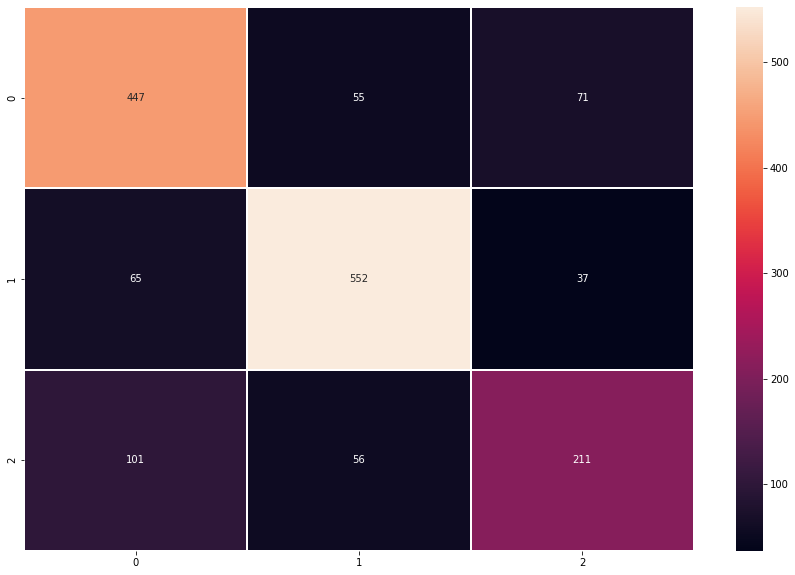

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(np.argmax(targets, axis = 1), np.argmax(outputs, axis = 1))
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cf_matrix, linewidths=1, annot=True, ax=ax, fmt='g')

In [ ]:
#np.argmax(targets, axis = 1)

array([2, 0, 1, ..., 1, 2, 0])

# test deploy

In [ ]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

In [ ]:
X_train, y_train = df_train['text'],df_train['label']
X_test, y_test = df_test['text'],df_test['label']

In [ ]:
X_train=X_train.values.astype('U')
X_test=X_test.values.astype('U')

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopWords = nltk.corpus.stopwords.words('/content/NepaliSentiment/nepali') + stopwords.words('english') + nltk.corpus.stopwords.words('/content/NepaliSentiment/hindi')

# create a TF-IDF vectorizer object

tfidf_vectorizer = TfidfVectorizer(max_features=1000,tokenizer=lambda x: x.split(" ") ,sublinear_tf=True, encoding='utf-8',decode_error='ignore',ngram_range=(1, 1),stop_words=stopWords)

# fit the object with the training data tweets
tfidf_vectorizer.fit(X_train)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


TfidfVectorizer(decode_error='ignore', max_features=1000,
                stop_words=['छ', 'र', 'पनि', 'छन्', 'लागि', 'भएको', 'गरेको',
                            'भने', 'गर्न', 'गर्ने', 'हो', 'तथा', 'यो', 'रहेको',
                            'उनले', 'थियो', 'हुने', 'गरेका', 'थिए', 'गर्दै',
                            'तर', 'नै', 'को', 'मा', 'हुन्', 'भन्ने', 'हुन',
                            'गरी', 'त', 'हुन्छ', ...],
                sublinear_tf=True,
                tokenizer=<function <lambda> at 0x7fbe19a52040>)

In [ ]:
train_idf = tfidf_vectorizer.transform(X_train)
test_idf  = tfidf_vectorizer.transform(X_test)

In [ ]:
# create the object of LinearRegression Model
model_LR = LogisticRegression()

# fit the model with the training data
model_LR.fit(train_idf, y_train)

# predict the label on the traning data
predict_train = model_LR.predict(train_idf)

# predict the model on the test data
predict_test = model_LR.predict(test_idf)

# f1 score on train data
f1_score(y_true= y_train, y_pred= predict_train, average = 'macro'), f1_score(y_true= y_test, y_pred= predict_test, average='macro')


(0.7389616479410014, 0.5065948653205213)

In [ ]:
# define the stages of the pipeline
pipeline = Pipeline(steps= [('tfidf', TfidfVectorizer(max_features=1000,
                                                      tokenizer=lambda x: x.split(" ") ,
                                                      sublinear_tf=True,
                                                      encoding='utf-8',
                                                      decode_error='ignore',
                                                      ngram_range=(1, 1),
                                                      stop_words=stopWords)),
                            ('model', LogisticRegression())])

# fit the pipeline model with the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(decode_error='ignore', max_features=1000,
                                 stop_words=['छ', 'र', 'पनि', 'छन्', 'लागि',
                                             'भएको', 'गरेको', 'भने', 'गर्न',
                                             'गर्ने', 'हो', 'तथा', 'यो',
                                             'रहेको', 'उनले', 'थियो', 'हुने',
                                             'गरेका', 'थिए', 'गर्दै', 'तर',
                                             'नै', 'को', 'मा', 'हुन्', 'भन्ने',
                                             'हुन', 'गरी', 'त', 'हुन्छ', ...],
                                 sublinear_tf=True,
                                 tokenizer=<function <lambda> at 0x7fbe1969d040>)),
                ('model', LogisticRegression())])

In [ ]:
# sample tweet
text = ["बधाई र सुभकामना ।।"]

# predict the label using the pipeline
pipeline.predict(text)

array(['1'], dtype=object)

In [ ]:
import dill

# Pickle the pipeline using dill
with open("pipeline.pkl", "wb") as f:
    dill.dump(pipeline, f)

In [ ]:
# import joblib
#from joblib import dump

# dump the pipeline model
#dump(pipeline, filename="text_sentiment_nepali.joblib")

In [ ]:
# import joblib
from joblib import load

# sample tweet text
text = ["बधाई र सुभकामना ।।"]

# load the saved pipleine model
# Pickle the pipeline using dill
with open("pipeline.pkl", "wb") as f:
    dill.dump(pipeline, f)

# predict on the sample tweet text
pipeline.predict(text)

array(['1'], dtype=object)